## Machine Learning

**Question 2** Using the synthetic data provided concerning patients' medication and symptoms, employ one or more classification algorithms of your choice to predict their diagnoses.

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving cleaned_formatted_data.csv to cleaned_formatted_data.csv


In [ ]:
data = pd.read_csv('question_2.csv', delimiter='\t', names=['patient_id', 'concept', 'extraction'])


In [ ]:
unique_value_count = data['patient_id'].nunique()
unique_value_count

1801

### Formatting the Given Dataset

In [ ]:
# Create a new column for each unique combination of concept
data['concept_count'] = data.groupby(['patient_id', 'concept']).cumcount() + 1


In [ ]:
# Pivot the DataFrame to reshape it
data = data.pivot(index='patient_id', columns=['concept', 'concept_count'], values='extraction')

In [ ]:
# Reset the index and flatten the column multi-index
data.reset_index(inplace=True)
data.columns = ['patient_id'] + [f'{col[0]}_{col[1]}' for col in data.columns[1:]]

In [ ]:
# Fill missing values
data.fillna('NA', inplace=True)

In [ ]:
# See the number of rows and columns
print("Rows, columns: " + str(data.shape))

Rows, columns: (1801, 8)


In [ ]:
data.head(20)

,patient_id,concept_1_1,diagnosis_1,medication_1,patient_experience_1,patient_experience_2,patient_experience_3,medication_2
0,AkrSyn_0x100310,NA,depressive disorder,NA,anxiety,suicidal,NA,NA
1,AkrSyn_0x100af2,NA,dementia,NA,hallucinations,agitation,NA,NA
2,AkrSyn_0x100e1f,NA,depressive disorder,NA,suicidal,NA,NA,NA
3,AkrSyn_0x101227,NA,dementia,clozapine,anxiety,NA,NA,methylphenidate
4,AkrSyn_0x101a1e,NA,depressive disorder,NA,hallucinations,agitation,suicidal,NA
5,AkrSyn_0x103a12,NA,dementia,donepezil,hallucinations,anxiety,worried,NA
6,AkrSyn_0x103bd5,NA,dementia,NA,hallucinations,NA,NA,NA
7,AkrSyn_0x1044a1,NA,depressive disorder,NA,anxiety,distress,NA,NA
8,AkrSyn_0x10536a,NA,dementia,memantine,worried,NA,NA,hypnotic
9,AkrSyn_0x105f40,NA,dementia,rivastigmine,worried,suicidal,anxiety,NA


In [ ]:
X_feature_names = [i for i in data.columns]


In [ ]:
print(X_feature_names)

['patient_id', 'concept_1_1', 'diagnosis_1', 'medication_1', 'patient_experience_1', 'patient_experience_2', 'patient_experience_3', 'medication_2']


In [ ]:
data.drop(columns=['concept_1_1'], inplace=True)


In [ ]:
# See the number of rows and columns
print("Rows, columns: " + str(data.shape))

Rows, columns: (1801, 8)


In [ ]:
#missing value counts
na_counts = (data == 'NA').sum()
na_counts

patient_id                 0
concept_1_1             1800
diagnosis_1                1
medication_1             881
patient_experience_1       1
patient_experience_2     578
patient_experience_3    1111
medication_2            1657
dtype: int64

In [ ]:
unique_values = data['medication_2'].unique()
print(unique_values)


['NA' 'methylphenidate' 'hypnotic' 'memantine' 'donepezil' 'venlafaxine'
 'rivastigmine' 'zuclopenthixol' 'risperidone' 'sertraline' 'clozapine'
 'lamotrigine' 'benzodiazepines' 'olanzapine' 'quetiapine' 'paroxetine'
 'citalopram' 'lofepramine' 'fluoxetine' 'mirtazepine' 'amitriptyline'
 'aripiprazole' 'clomipramine']


In [ ]:
data.head(30)

,patient_id,diagnosis_1,medication_1,patient_experience_1,patient_experience_2,patient_experience_3,medication_2
0,AkrSyn_0x100310,depressive disorder,NA,anxiety,suicidal,NA,NA
1,AkrSyn_0x100af2,dementia,NA,hallucinations,agitation,NA,NA
2,AkrSyn_0x100e1f,depressive disorder,NA,suicidal,NA,NA,NA
3,AkrSyn_0x101227,dementia,clozapine,anxiety,NA,NA,methylphenidate
4,AkrSyn_0x101a1e,depressive disorder,NA,hallucinations,agitation,suicidal,NA
5,AkrSyn_0x103a12,dementia,donepezil,hallucinations,anxiety,worried,NA
6,AkrSyn_0x103bd5,dementia,NA,hallucinations,NA,NA,NA
7,AkrSyn_0x1044a1,depressive disorder,NA,anxiety,distress,NA,NA
8,AkrSyn_0x10536a,dementia,memantine,worried,NA,NA,hypnotic
9,AkrSyn_0x105f40,dementia,rivastigmine,worried,suicidal,anxiety,NA


### Saving the formatted data





In [ ]:
data.to_csv('formatted_data.csv', index=False)


In [ ]:
from google.colab import files

files.download('formatted_data.csv')



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Exploratory Data Analysis

In [ ]:
### Loading the data
df = pd.read_csv("formatted_data.csv")

In [ ]:
df.head(30)

,patient_id,diagnosis_1,medication_1,patient_experience_1,patient_experience_2,patient_experience_3,medication_2
0,AkrSyn_0x100310,depressive disorder,NA,anxiety,suicidal,NA,NA
1,AkrSyn_0x100af2,dementia,NA,hallucinations,agitation,NA,NA
2,AkrSyn_0x100e1f,depressive disorder,NA,suicidal,NA,NA,NA
3,AkrSyn_0x101227,dementia,clozapine,anxiety,NA,NA,methylphenidate
4,AkrSyn_0x101a1e,depressive disorder,NA,hallucinations,agitation,suicidal,NA
5,AkrSyn_0x103a12,dementia,donepezil,hallucinations,anxiety,worried,NA
6,AkrSyn_0x103bd5,dementia,NA,hallucinations,NA,NA,NA
7,AkrSyn_0x1044a1,depressive disorder,NA,anxiety,distress,NA,NA
8,AkrSyn_0x10536a,dementia,memantine,worried,NA,NA,hypnotic
9,AkrSyn_0x105f40,dementia,rivastigmine,worried,suicidal,anxiety,NA


In [ ]:
# Missing Values
print(df.isna().sum())

patient_id                 0
diagnosis_1                1
medication_1             881
patient_experience_1       1
patient_experience_2     578
patient_experience_3    1111
medication_2            1657
dtype: int64


In the case of medical data, when we have a limited number of values available, it is challenging to make assumptions or fill in the null values. However, when we have a sufficient amount of data, we can sometimes assume null values based on the associations between given features.

In [ ]:
# 'medication_2' and 'patient_experiance_3' columns contains mostly null values.
df.drop(columns=['medication_2'], inplace=True)
df.drop(columns=['patient_experience_3'], inplace=True)


In [ ]:
df.head()

,patient_id,diagnosis_1,medication_1,patient_experience_1,patient_experience_2
0,AkrSyn_0x100310,depressive disorder,NaN,anxiety,suicidal
1,AkrSyn_0x100af2,dementia,NaN,hallucinations,agitation
2,AkrSyn_0x100e1f,depressive disorder,NaN,suicidal,NaN
3,AkrSyn_0x101227,dementia,clozapine,anxiety,NaN
4,AkrSyn_0x101a1e,depressive disorder,NaN,hallucinations,agitation


In [ ]:
df.rename(columns={'diagnosis_1': 'diagnosis'}, inplace=True)

In [ ]:
df.rename(columns={'medication_1': 'medication'}, inplace=True)

In [ ]:
df.head()

,patient_id,diagnosis,medication,patient_experience_1,patient_experience_2
0,AkrSyn_0x100310,depressive disorder,NaN,anxiety,suicidal
1,AkrSyn_0x100af2,dementia,NaN,hallucinations,agitation
2,AkrSyn_0x100e1f,depressive disorder,NaN,suicidal,NaN
3,AkrSyn_0x101227,dementia,clozapine,anxiety,NaN
4,AkrSyn_0x101a1e,depressive disorder,NaN,hallucinations,agitation


In [ ]:
# Missing Values
print(df.isna().sum())

patient_id                0
diagnosis                 1
medication              881
patient_experience_1      1
patient_experience_2    578
dtype: int64


### Saving cleaned Data

In [ ]:
#creating copy of the cleaned data
df.to_csv('cleaned_formatted_data.csv', index=False)

#download a copy of the processed data to the local system
from google.colab import files

files.download('cleaned_formatted_data.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

 **Handling Null Values:** Implementing predictive imputation using RandomForest classifier to predict the medication column null values based on patient experiances and diagnosis.

In [ ]:
# Missing Values
print(df.isna().sum())

patient_id                0
diagnosis                 1
medication              881
patient_experience_1      1
patient_experience_2    578
dtype: int64


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1801 entries, 0 to 1800
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   patient_id            1801 non-null   object
 1   diagnosis_1           1800 non-null   object
 2   medication_1          920 non-null    object
 3   patient_experience_1  1800 non-null   object
 4   patient_experience_2  1223 non-null   object
 5   patient_experience_3  690 non-null    object
 6   medication_2          144 non-null    object
dtypes: object(7)
memory usage: 98.6+ KB


In [ ]:
# Data cleaning
# Use boolean indexing to filter rows with null values in the 'diagnosis' column
rows_with_null_diagnosis = df[df['diagnosis'].isnull()]

# Print the rows with null 'diagnosis'
print(rows_with_null_diagnosis)


      patient_id diagnosis medication patient_experience_1  \
1800  patient_id       NaN        NaN                  NaN   

     patient_experience_2  
1800                  NaN  


In [ ]:
# Drop the row that contains null value to the diagnosis
df = df.dropna(subset=['diagnosis'])

In [ ]:
# Predictive Imputation
label_encoder = LabelEncoder()

# Encode the "diagnosis" column
df['diagnosis_1_encoded'] = label_encoder.fit_transform(df['diagnosis'])


In [ ]:
# Create a new DataFrame for imputation
impute_df = df.dropna(subset=['medication'])

# Select columns for modeling
X = impute_df[['patient_experience_1', 'patient_experience_2', 'diagnosis_1_encoded']]
y = impute_df['medication']


In [ ]:
# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# Define which columns will be one-hot encoded
categorical_cols = ['patient_experience_1', 'patient_experience_2']

In [ ]:
# Create a transformer for one-hot encoding
ct = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), categorical_cols)
    ],
    remainder='passthrough'
)

In [ ]:
# Create a pipeline that includes one-hot encoding and the RandomForestClassifier
model = Pipeline([
    ('preprocessor', ct),
    ('classifier', RandomForestClassifier(random_state=42))
])

In [ ]:
# Fit the model
model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat', OneHotEncoder(),
                                                  ['patient_experience_1',
                                                   'patient_experience_2'])])),
                ('classifier', RandomForestClassifier(random_state=42))])

In [ ]:
df.head()

,patient_id,diagnosis,medication,patient_experience_1,patient_experience_2,diagnosis_1_encoded
0,AkrSyn_0x100310,depressive disorder,NaN,anxiety,suicidal,2
1,AkrSyn_0x100af2,dementia,NaN,hallucinations,agitation,1
2,AkrSyn_0x100e1f,depressive disorder,NaN,suicidal,NaN,2
3,AkrSyn_0x101227,dementia,clozapine,anxiety,NaN,1
4,AkrSyn_0x101a1e,depressive disorder,NaN,hallucinations,agitation,2


In [ ]:
print(df['medication'].isnull().sum())


880


In [ ]:
# Select rows with missing values in "medication_1"
missing_medication_rows = df[df['medication'].isnull()]

# Prepare input data for imputation
X_impute = missing_medication_rows[['patient_experience_1', 'patient_experience_2', 'diagnosis_1_encoded']]

# Predict missing values
predicted_medication = model.predict(X_impute)

# Assign the predicted values back to the DataFrame using .loc
df.loc[missing_medication_rows.index, 'medication'] = predicted_medication



In [ ]:
df.head()

,patient_id,diagnosis,medication,patient_experience_1,patient_experience_2,diagnosis_1_encoded
0,AkrSyn_0x100310,depressive disorder,methylphenidate,anxiety,suicidal,2
1,AkrSyn_0x100af2,dementia,rivastigmine,hallucinations,agitation,1
2,AkrSyn_0x100e1f,depressive disorder,methylphenidate,suicidal,NaN,2
3,AkrSyn_0x101227,dementia,clozapine,anxiety,NaN,1
4,AkrSyn_0x101a1e,depressive disorder,clomipramine,hallucinations,agitation,2


In [ ]:
impute_df.head()

,patient_id,diagnosis,medication,patient_experience_1,patient_experience_2,diagnosis_1_encoded
3,AkrSyn_0x101227,dementia,clozapine,anxiety,NaN,1
5,AkrSyn_0x103a12,dementia,donepezil,hallucinations,anxiety,1
8,AkrSyn_0x10536a,dementia,memantine,worried,NaN,1
9,AkrSyn_0x105f40,dementia,rivastigmine,worried,suicidal,1
10,AkrSyn_0x105f7a,depressive disorder,lofepramine,anxiety,NaN,2


In [ ]:
df.drop(columns=['diagnosis_1_encoded'], inplace=True)

In [ ]:
df.head()

,patient_id,diagnosis,medication,patient_experience_1,patient_experience_2
0,AkrSyn_0x100310,depressive disorder,methylphenidate,anxiety,suicidal
1,AkrSyn_0x100af2,dementia,rivastigmine,hallucinations,agitation
2,AkrSyn_0x100e1f,depressive disorder,methylphenidate,suicidal,NaN
3,AkrSyn_0x101227,dementia,clozapine,anxiety,NaN
4,AkrSyn_0x101a1e,depressive disorder,clomipramine,hallucinations,agitation


In [ ]:
#creating copy of the cleaned data
df.to_csv('cleaned_question2_data.csv', index=False)

#download a copy of the processed data to the local system
from google.colab import files

files.download('cleaned_question2_data.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

#### Data Visualization

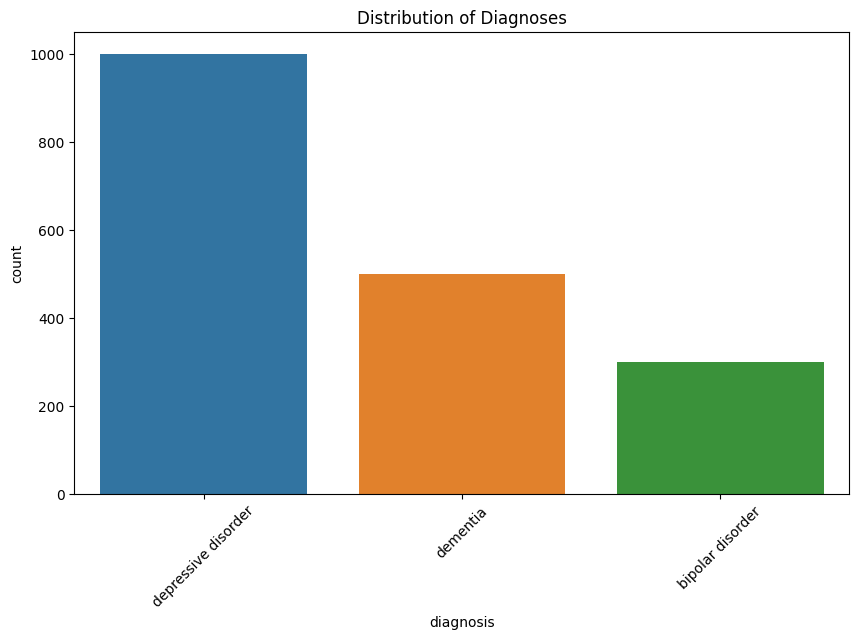

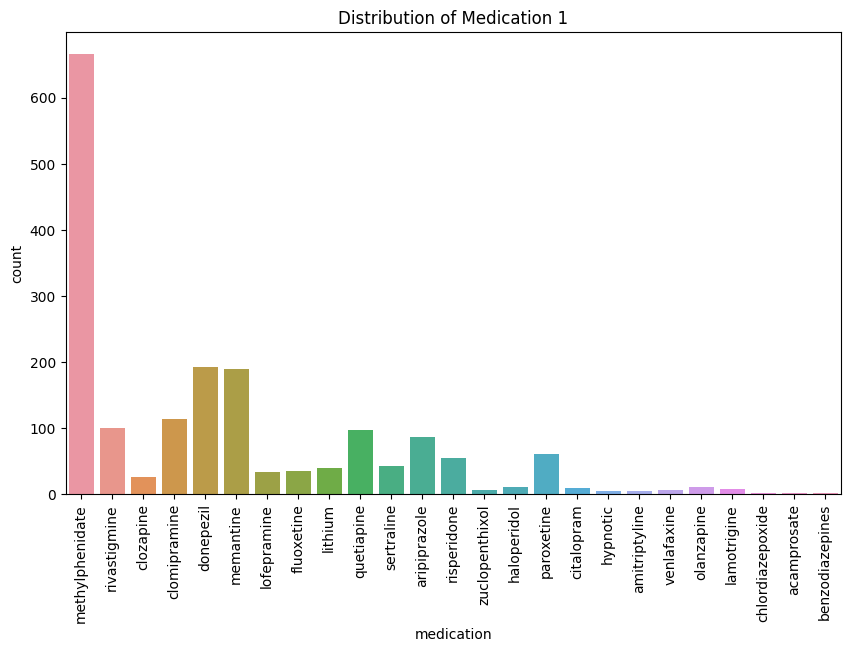

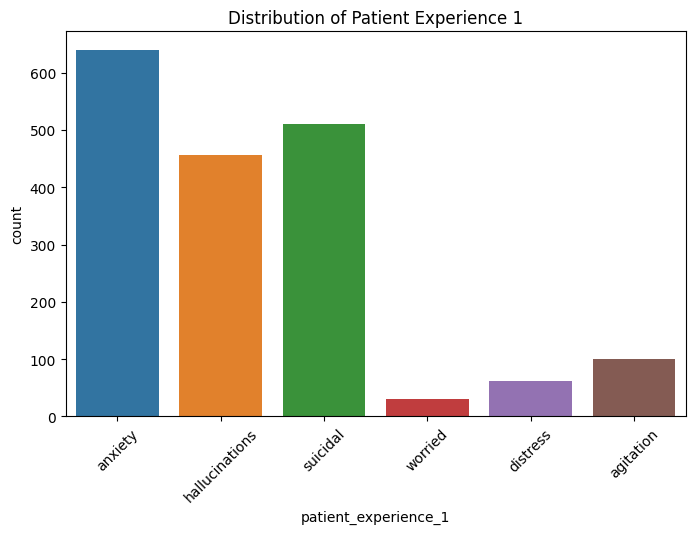

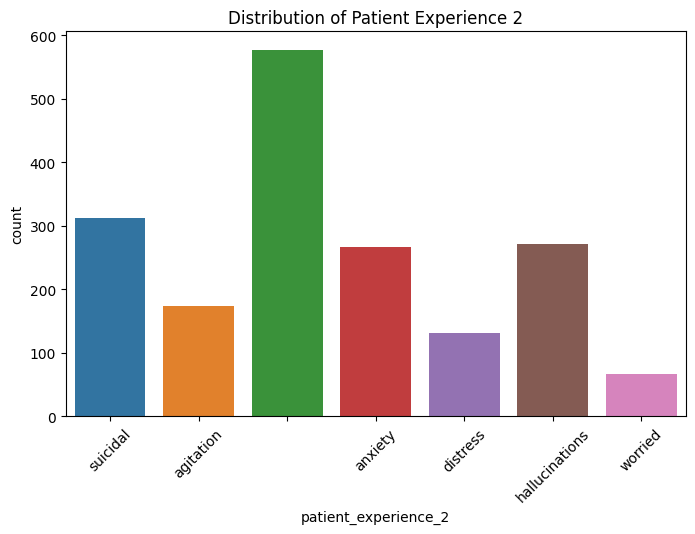

In [ ]:
# Countplot for 'diagnosis_1'
plt.figure(figsize=(10, 6))
sns.countplot(x='diagnosis', data=df)
plt.xticks(rotation=45)
plt.title('Distribution of Diagnoses')
plt.show()

# Countplot for 'medication_1'
plt.figure(figsize=(10, 6))
sns.countplot(x='medication', data=df)
plt.xticks(rotation=90)
plt.title('Distribution of Medication 1')
plt.show()

# Countplot for 'patient_experience_1'
plt.figure(figsize=(8, 5))
sns.countplot(x='patient_experience_1', data=df)
plt.xticks(rotation=45)
plt.title('Distribution of Patient Experience 1')
plt.show()

# Countplot for 'patient_experience_2'
plt.figure(figsize=(8, 5))
sns.countplot(x='patient_experience_2', data=df)
plt.xticks(rotation=45)
plt.title('Distribution of Patient Experience 2')
plt.show()




From the above diagrams, we can see that there is imbalanced data in every column. However, we cannot apply imbalanced data handling methods to every column because health-related data is very complex, and we must exercise great care when dealing with health data. We cannot make too many predictions; we must preserve the data as it is to ensure the highest accuracy in our predictions. Therefore, we are going to apply data imbalance handling methods to the target variable column, namely, the diagnosis column.

Given that the dataset contains a limited number of features, there is no need to apply a feature selection process. Our decisions are based on the values in the medication, patient_experience_1, and patient_experience_2 columns.

Before applying the imbalance handling method, we first train the model on the unbalanced dataset. Afterward, we evaluate the model's performance using metrics such as accuracy, precision, recall, F1-score, and cross-validation. Subsequently, we proceed with the imbalance handling method to enhance the model's performance.

## Model Training

We have three classes: dementia, bipolar disorder, and depressive disorder. Therefore, our classification problem falls under the multi-class variation classification.

We are going to train four classification algorithms here: Random Forest, Naive Bayes, SVM, and XGBoost. All of these algorithms are suitable for multi-class variation classification, and they perform well with text data. Additionally, they are proficient in handling imbalanced data.

To comprehend the impact of null values on prediction results, we will be using three subsets of the given dataset, namely:

1. The row dataset - Row data which is restructured into an appropriate format
   that can be trained by models.

2. The formatted dataset with most null value columns removed: I removed two
   columns, 'medication_2' and 'patient_experience_3,' which contained 1657 and 1111 null values, respectively, out of 1800 entries.

3. The completely cleaned dataset: with the 'medication_2' column null values    replaced using predictive imputation.









In [ ]:
# Loading formatted data
from google.colab import files
uploaded = files.upload()

Saving formatted_data.csv to formatted_data.csv


## Model 1: Random Forest

### Use case 1: Train Random Forest Model on formatted cleaned dataset (medication_2 and patient_experiance_3 columns removed)

In [ ]:
df=pd.read_csv("cleaned_formatted_data.csv")

In [ ]:
df.head(10)

,patient_id,diagnosis,medication,patient_experience_1,patient_experience_2
0,AkrSyn_0x100310,depressive disorder,NaN,anxiety,suicidal
1,AkrSyn_0x100af2,dementia,NaN,hallucinations,agitation
2,AkrSyn_0x100e1f,depressive disorder,NaN,suicidal,NaN
3,AkrSyn_0x101227,dementia,clozapine,anxiety,NaN
4,AkrSyn_0x101a1e,depressive disorder,NaN,hallucinations,agitation
5,AkrSyn_0x103a12,dementia,donepezil,hallucinations,anxiety
6,AkrSyn_0x103bd5,dementia,NaN,hallucinations,NaN
7,AkrSyn_0x1044a1,depressive disorder,NaN,anxiety,distress
8,AkrSyn_0x10536a,dementia,memantine,worried,NaN
9,AkrSyn_0x105f40,dementia,rivastigmine,worried,suicidal


import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(_df_0, *['index'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(_df_1, *['index'], **{})
chart

import numpy as np
from google.colab import autoviz

def categorical_histogram(df, colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  df.groupby(colname).size().plot(kind='barh', color=sns.palettes.mpl_palette(mpl_palette_name), figsize=(8*figscale, 4.8*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  return autoviz.MplChart.from_current_mpl_state()

chart = categorical_histogram(_df_2, *['diagnosis'], **{})
chart

import numpy as np
from google.colab import autoviz

def categorical_histogram(df, colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  df.groupby(colname).size().plot(kind='barh', color=sns.palettes.mpl_palette(mpl_palette_name), figsize=(8*figscale, 4.8*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  return autoviz.MplChart.from_current_mpl_state()

chart = categorical_histogram(_df_3, *['medication'], **{})
chart

import numpy as np
from google.colab import autoviz

def categorical_histogram(df, colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  df.groupby(colname).size().plot(kind='barh', color=sns.palettes.mpl_palette(mpl_palette_name), figsize=(8*figscale, 4.8*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  return autoviz.MplChart.from_current_mpl_state()

chart = categorical_histogram(_df_4, *['patient_experience_1'], **{})
chart

import numpy as np
from google.colab import autoviz

def categorical_histogram(df, colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  df.groupby(colname).size().plot(kind='barh', color=sns.palettes.mpl_palette(mpl_palette_name), figsize=(8*figscale, 4.8*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  return autoviz.MplChart.from_current_mpl_state()

chart = categorical_histogram(_df_5, *['patient_experience_2'], **{})
chart

import numpy as np
from google.colab import autoviz

def heatmap(df, x_colname, y_colname, figscale=1, mpl_palette_name='viridis'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  import pandas as pd
  plt.subplots(figsize=(8 * figscale, 8 * figscale))
  df_2dhist = pd.DataFrame({
      x_label: grp[y_colname].value_counts()
      for x_label, grp in df.groupby(x_colname)
  })
  sns.heatmap(df_2dhist, cmap=mpl_palette_name)
  plt.xlabel(x_colname)
  plt.ylabel(y_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = heatmap(_df_6, *['diagnosis', 'medication'], **{})
chart

import numpy as np
from google.colab import autoviz

def heatmap(df, x_colname, y_colname, figscale=1, mpl_palette_name='viridis'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  import pandas as pd
  plt.subplots(figsize=(8 * figscale, 8 * figscale))
  df_2dhist = pd.DataFrame({
      x_label: grp[y_colname].value_counts()
      for x_label, grp in df.groupby(x_colname)
  })
  sns.heatmap(df_2dhist, cmap=mpl_palette_name)
  plt.xlabel(x_colname)
  plt.ylabel(y_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = heatmap(_df_7, *['medication', 'patient_experience_1'], **{})
chart

import numpy as np
from google.colab import autoviz

def heatmap(df, x_colname, y_colname, figscale=1, mpl_palette_name='viridis'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  import pandas as pd
  plt.subplots(figsize=(8 * figscale, 8 * figscale))
  df_2dhist = pd.DataFrame({
      x_label: grp[y_colname].value_counts()
      for x_label, grp in df.groupby(x_colname)
  })
  sns.heatmap(df_2dhist, cmap=mpl_palette_name)
  plt.xlabel(x_colname)
  plt.ylabel(y_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = heatmap(_df_8, *['patient_experience_1', 'patient_experience_2'], **{})
chart

import numpy as np
from google.colab import autoviz

def violin_plot(df, value_colname, facet_colname, figscale=1, mpl_palette_name='Dark2', **kwargs):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (12 * figscale, 1.2 * figscale * len(df[facet_colname].unique()))
  plt.figure(figsize=figsize)
  sns.violinplot(df, x=value_colname, y=facet_colname, palette=mpl_palette_name, **kwargs)
  sns.despine(top=True, right=True, bottom=True, left=True)
  return autoviz.MplChart.from_current_mpl_state()

chart = violin_plot(_df_9, *['index', 'diagnosis'], **{'inner': 'stick'})
chart

import numpy as np
from google.colab import autoviz

def violin_plot(df, value_colname, facet_colname, figscale=1, mpl_palette_name='Dark2', **kwargs):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (12 * figscale, 1.2 * figscale * len(df[facet_colname].unique()))
  plt.figure(figsize=figsize)
  sns.violinplot(df, x=value_colname, y=facet_colname, palette=mpl_palette_name, **kwargs)
  sns.despine(top=True, right=True, bottom=True, left=True)
  return autoviz.MplChart.from_current_mpl_state()

chart = violin_plot(_df_10, *['index', 'medication'], **{'inner': 'stick'})
chart

import numpy as np
from google.colab import autoviz

def violin_plot(df, value_colname, facet_colname, figscale=1, mpl_palette_name='Dark2', **kwargs):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (12 * figscale, 1.2 * figscale * len(df[facet_colname].unique()))
  plt.figure(figsize=figsize)
  sns.violinplot(df, x=value_colname, y=facet_colname, palette=mpl_palette_name, **kwargs)
  sns.despine(top=True, right=True, bottom=True, left=True)
  return autoviz.MplChart.from_current_mpl_state()

chart = violin_plot(_df_11, *['index', 'patient_experience_1'], **{'inner': 'stick'})
chart

import numpy as np
from google.colab import autoviz

def violin_plot(df, value_colname, facet_colname, figscale=1, mpl_palette_name='Dark2', **kwargs):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (12 * figscale, 1.2 * figscale * len(df[facet_colname].unique()))
  plt.figure(figsize=figsize)
  sns.violinplot(df, x=value_colname, y=facet_colname, palette=mpl_palette_name, **kwargs)
  sns.despine(top=True, right=True, bottom=True, left=True)
  return autoviz.MplChart.from_current_mpl_state()

chart = violin_plot(_df_12, *['index', 'patient_experience_2'], **{'inner': 'stick'})
chart

import numpy as np
from google.colab import autoviz

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (10 * figscale, 5.2 * figscale)
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(_df_13, *['index', 'count()', 'diagnosis'], **{})
chart

import numpy as np
from google.colab import autoviz

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (10 * figscale, 5.2 * figscale)
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(_df_14, *['index', 'count()', 'medication'], **{})
chart

import numpy as np
from google.colab import autoviz

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (10 * figscale, 5.2 * figscale)
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(_df_15, *['index', 'count()', 'patient_experience_1'], **{})
chart

import numpy as np
from google.colab import autoviz

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (10 * figscale, 5.2 * figscale)
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(_df_16, *['index', 'count()', 'patient_experience_2'], **{})
chart

In [ ]:
# Use boolean indexing to filter rows with null values in the 'diagnosis' column
rows_with_null_diagnosis = df[df['diagnosis'].isnull()]

# Print the rows with null 'diagnosis'
print(rows_with_null_diagnosis)

      patient_id diagnosis medication patient_experience_1  \
1800  patient_id       NaN        NaN                  NaN   

     patient_experience_2  
1800                  NaN  


In [ ]:
df = df.dropna(subset=['diagnosis'])

In [ ]:
# Use boolean indexing to filter rows with null values in the 'diagnosis' column
rows_with_null_diagnosis = df[df['diagnosis'].isnull()]

# Print the rows with null 'diagnosis'
print(rows_with_null_diagnosis)

Empty DataFrame
Columns: [patient_id, diagnosis, medication, patient_experience_1, patient_experience_2]
Index: []


In [ ]:
# Handling missing values
# Fill missing values with 'Unknown'
df['medication'].fillna('Unknown', inplace=True)
df['patient_experience_1'].fillna('Unknown', inplace=True)
df['patient_experience_2'].fillna('Unknown', inplace=True)

In [ ]:
# Encode categorical columns ('medication', 'patient_experience_1', 'patient_experience_2')
label_encoder = LabelEncoder()
df['medication'] = label_encoder.fit_transform(df['medication'])
df['patient_experience_1'] = label_encoder.fit_transform(df['patient_experience_1'])
df['patient_experience_2'] = label_encoder.fit_transform(df['patient_experience_2'])

In [ ]:
# Split the data into features (X) and the target variable (y)
X = df[['medication', 'patient_experience_1', 'patient_experience_2']]
y = df['diagnosis']

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Create and train the Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
# Make predictions on the test set
y_pred = rf_classifier.predict(X_test)

In [ ]:
# Evaluate the model's performance
accuracy_rf_1 = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy_rf_1:.2f}')

Accuracy: 0.78


In [ ]:
classification_rep = classification_report(y_test, y_pred)
print('Classification Report:')
print(classification_rep)

Classification Report:
                     precision    recall  f1-score   support

   bipolar disorder       0.48      0.24      0.32        51
           dementia       0.85      0.80      0.83        86
depressive disorder       0.79      0.90      0.84       223

           accuracy                           0.78       360
          macro avg       0.71      0.65      0.66       360
       weighted avg       0.76      0.78      0.76       360



In [ ]:
# Confusion Matrix
conf_matrix_rf_1 = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(conf_matrix_rf_1)

Confusion Matrix:
[[ 12   3  36]
 [  0  69  17]
 [ 13   9 201]]


In [ ]:
# Cross-validation to estimate model performance
cv_scores_rf_1 = cross_val_score(rf_classifier, X, y, cv=5)
print('Cross-Validation Scores:')
print(cv_scores_rf_1)
print(f'Mean CV Accuracy: {cv_scores_rf_1.mean():.2f}')

Cross-Validation Scores:
[0.77777778 0.77777778 0.79166667 0.74166667 0.77222222]
Mean CV Accuracy: 0.77


### Use case 2: Train model on re-structured(formatted) data

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving formatted_data.csv to formatted_data (1).csv


In [ ]:
data = pd.read_csv("formatted_data.csv")

In [ ]:
data.head()

,patient_id,diagnosis_1,medication_1,patient_experience_1,patient_experience_2,patient_experience_3,medication_2
0,AkrSyn_0x100310,depressive disorder,NaN,anxiety,suicidal,NaN,NaN
1,AkrSyn_0x100af2,dementia,NaN,hallucinations,agitation,NaN,NaN
2,AkrSyn_0x100e1f,depressive disorder,NaN,suicidal,NaN,NaN,NaN
3,AkrSyn_0x101227,dementia,clozapine,anxiety,NaN,NaN,methylphenidate
4,AkrSyn_0x101a1e,depressive disorder,NaN,hallucinations,agitation,suicidal,NaN


In [ ]:
# Missing Values
print(data.isna().sum())

patient_id                 0
diagnosis_1                1
medication_1             881
patient_experience_1       1
patient_experience_2     578
patient_experience_3    1111
medication_2            1657
dtype: int64


In [ ]:
data.rename(columns={'diagnosis_1': 'diagnosis'}, inplace=True)

In [ ]:
# Use boolean indexing to filter rows with null values in the 'diagnosis' column
rows_with_null_diagnosis = data[data['diagnosis'].isnull()]

# Print the rows with null 'diagnosis'
print(rows_with_null_diagnosis)

      patient_id diagnosis medication_1 patient_experience_1  \
1800  patient_id       NaN          NaN                  NaN   

     patient_experience_2 patient_experience_3 medication_2  
1800                  NaN                  NaN          NaN  


In [ ]:
data = data.dropna(subset=['diagnosis'])

In [ ]:
# Handling missing values
# Fill missing values with 'Unknown'
data['medication_1'].fillna('Unknown', inplace=True)
data['medication_2'].fillna('Unknown', inplace=True)
data['patient_experience_1'].fillna('Unknown', inplace=True)
data['patient_experience_2'].fillna('Unknown', inplace=True)
data['patient_experience_3'].fillna('Unknown', inplace=True)

In [ ]:
# Encode categorical columns ('medication_1','medication_2', 'patient_experience_1', 'patient_experience_2', 'patient_experience_2')
label_encoder = LabelEncoder()
data['medication_1'] = label_encoder.fit_transform(data['medication_1'])
data['medication_2'] = label_encoder.fit_transform(data['medication_2'])
data['patient_experience_1'] = label_encoder.fit_transform(data['patient_experience_1'])
data['patient_experience_2'] = label_encoder.fit_transform(data['patient_experience_2'])
data['patient_experience_3'] = label_encoder.fit_transform(data['patient_experience_3'])

In [ ]:
# Split the data into features (X) and the target variable (y)
X = data[['medication_1', 'medication_2', 'patient_experience_1', 'patient_experience_2', 'patient_experience_3']]
y = data['diagnosis']

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Create and train the Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
# Make predictions on the test set
y_pred = rf_classifier.predict(X_test)

In [ ]:
# Evaluate the model's performance
accuracy_rf_2 = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy_rf_2:.2f}')

Accuracy: 0.75


In [ ]:
classification_rep = classification_report(y_test, y_pred)
print('Classification Report:')
print(classification_rep)

Classification Report:
                     precision    recall  f1-score   support

   bipolar disorder       0.38      0.25      0.31        51
           dementia       0.78      0.84      0.81        86
depressive disorder       0.79      0.83      0.81       223

           accuracy                           0.75       360
          macro avg       0.65      0.64      0.64       360
       weighted avg       0.73      0.75      0.74       360



In [ ]:
# Confusion Matrix
conf_matrix_rf_2 = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(conf_matrix_rf_2)

Confusion Matrix:
[[ 13   2  36]
 [  1  72  13]
 [ 20  18 185]]


In [ ]:
# Cross-validation to estimate model performance
cv_scores_rf_2 = cross_val_score(rf_classifier, X, y, cv=5)
print('Cross-Validation Scores:')
print(cv_scores_rf_2)
print(f'Mean CV Accuracy: {cv_scores_rf_2.mean():.2f}')

Cross-Validation Scores:
[0.75833333 0.77222222 0.78055556 0.74444444 0.75      ]
Mean CV Accuracy: 0.76


### Use case 3: Train Random Forest on completely cleaned Dataset ('medication' column NULL value replaced)

In [ ]:
df=pd.read_csv("cleaned_question2_data.csv")

In [ ]:
df.head()

,patient_id,diagnosis,medication,patient_experience_1,patient_experience_2
0,AkrSyn_0x100310,depressive disorder,methylphenidate,anxiety,suicidal
1,AkrSyn_0x100af2,dementia,rivastigmine,hallucinations,agitation
2,AkrSyn_0x100e1f,depressive disorder,methylphenidate,suicidal,NaN
3,AkrSyn_0x101227,dementia,clozapine,anxiety,NaN
4,AkrSyn_0x101a1e,depressive disorder,clomipramine,hallucinations,agitation


In [ ]:
# Missing Values
print(df.isna().sum())

patient_id                0
diagnosis                 0
medication                0
patient_experience_1      0
patient_experience_2    577
dtype: int64


In [ ]:
# Use boolean indexing to filter rows with null values in the 'diagnosis' column
rows_with_null_diagnosis = df[df['diagnosis'].isnull()]

# Print the rows with null 'diagnosis'
print(rows_with_null_diagnosis)

Empty DataFrame
Columns: [patient_id, diagnosis, medication, patient_experience_1, patient_experience_2]
Index: []


In [ ]:
# Handling missing values
# Fill missing values with 'Unknown'
df['medication'].fillna('Unknown', inplace=True)
df['patient_experience_1'].fillna('Unknown', inplace=True)
df['patient_experience_2'].fillna('Unknown', inplace=True)

In [ ]:
# Encode categorical columns ('medication', 'patient_experience_1', 'patient_experience_2')
label_encoder = LabelEncoder()
df['medication'] = label_encoder.fit_transform(df['medication'])
df['patient_experience_1'] = label_encoder.fit_transform(df['patient_experience_1'])
df['patient_experience_2'] = label_encoder.fit_transform(df['patient_experience_2'])

In [ ]:
# Split the data into features (X) and the target variable (y)
X = df[['medication', 'patient_experience_1', 'patient_experience_2']]
y = df['diagnosis']

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Create and train the Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
# Make predictions on the test set
y_pred = rf_classifier.predict(X_test)

In [ ]:
# Evaluate the model's performance
accuracy_rf_3 = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy_rf_3:.2f}')

Accuracy: 0.91


In [ ]:
classification_rep = classification_report(y_test, y_pred)
print('Classification Report:')
print(classification_rep)

Classification Report:
                     precision    recall  f1-score   support

   bipolar disorder       0.76      0.75      0.75        51
           dementia       0.90      0.99      0.94        86
depressive disorder       0.95      0.92      0.93       223

           accuracy                           0.91       360
          macro avg       0.87      0.88      0.88       360
       weighted avg       0.91      0.91      0.91       360



In [ ]:
# Confusion Matrix
conf_matrix_rf_3 = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(conf_matrix_rf_3)

Confusion Matrix:
[[ 38   3  10]
 [  0  85   1]
 [ 12   6 205]]


In [ ]:
# Cross-validation to estimate model performance
cv_scores_rf_3 = cross_val_score(rf_classifier, X, y, cv=5)
print('Cross-Validation Scores:')
print(cv_scores_rf_3)
print(f'Mean CV Accuracy: {cv_scores_rf_3.mean():.2f}')

Cross-Validation Scores:
[0.91666667 0.90277778 0.91944444 0.91111111 0.91666667]
Mean CV Accuracy: 0.91


## Model 2: Naive Bayes

### Use case 1: Train Naive Bayes on completely cleaned Dataset ('medication' column NULL value replaced)

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving cleaned_question2_data.csv to cleaned_question2_data (1).csv


In [ ]:
naive_cleaned_data=pd.read_csv("cleaned_question2_data.csv")

In [ ]:
naive_cleaned_data = naive_cleaned_data.dropna(subset=['diagnosis'])

In [ ]:
# Data Preprocessing
# Fill missing values in 'medication', 'patient_experience_1' and 'patient_experience_2' columns
naive_cleaned_data['medication'].fillna('', inplace=True)
naive_cleaned_data['patient_experience_1'].fillna('', inplace=True)
naive_cleaned_data['patient_experience_2'].fillna('', inplace=True)

In [ ]:
naive_cleaned_data.head()

,patient_id,diagnosis,medication,patient_experience_1,patient_experience_2
0,AkrSyn_0x100310,depressive disorder,methylphenidate,anxiety,suicidal
1,AkrSyn_0x100af2,dementia,rivastigmine,hallucinations,agitation
2,AkrSyn_0x100e1f,depressive disorder,methylphenidate,suicidal,
3,AkrSyn_0x101227,dementia,clozapine,anxiety,
4,AkrSyn_0x101a1e,depressive disorder,clomipramine,hallucinations,agitation


In [ ]:
# Combine text columns into a single feature column
naive_cleaned_data['combined_features'] = naive_cleaned_data['medication'] + ' ' + naive_cleaned_data['patient_experience_1'] + ' ' + naive_cleaned_data['patient_experience_2']

In [ ]:
# Split the data into training and testing sets
X = naive_cleaned_data['combined_features']
y = naive_cleaned_data['diagnosis']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Text Vectorization (Converting text data into numerical features)
vectorizer = CountVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)


In [ ]:
# Build and Train the Naive Bayes Classifier
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train_vec, y_train)

MultinomialNB()

In [ ]:
# Make predictions on the test set
y_pred = nb_classifier.predict(X_test_vec)

In [ ]:
# Model Evaluation
accuracy_nb_1 = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy_nb_1:.2f}')

Accuracy: 0.94


In [ ]:
# Print a classification report for more detailed evaluation
print(classification_report(y_test, y_pred))

                     precision    recall  f1-score   support

   bipolar disorder       0.87      0.76      0.81        51
           dementia       0.98      1.00      0.99        86
depressive disorder       0.95      0.96      0.96       223

           accuracy                           0.94       360
          macro avg       0.93      0.91      0.92       360
       weighted avg       0.94      0.94      0.94       360



In [ ]:
# Confusion Matrix
conf_matrix_nb_1 = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(conf_matrix_nb_1)

Confusion Matrix:
[[ 39   0  12]
 [  0  86   0]
 [  6   2 215]]


In [ ]:
# Cross-validation to estimate model performance
cv_scores_nb_1 = cross_val_score(nb_classifier, X_train_vec, y_train, cv=5)
print('Cross-Validation Scores:')
print(cv_scores_nb_1)
print(f'Mean CV Accuracy: {cv_scores_nb_1.mean():.2f}')

Cross-Validation Scores:
[0.93055556 0.95486111 0.91666667 0.92708333 0.9375    ]
Mean CV Accuracy: 0.93


### Use case 2: Train Naive Bayes on formatted cleaned dataset (medication_2 and patient_experiance_3 columns removed)

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving cleaned_formatted_data.csv to cleaned_formatted_data (1).csv


In [ ]:
naive_data=pd.read_csv("cleaned_formatted_data.csv")

In [ ]:
naive_data = naive_data.dropna(subset=['diagnosis'])

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
# Data Preprocessing
# Fill missing values in 'medication', 'patient_experience_1' and 'patient_experience_2' columns
naive_data['medication'].fillna('', inplace=True)
naive_data['patient_experience_1'].fillna('', inplace=True)
naive_data['patient_experience_2'].fillna('', inplace=True)

In [ ]:
naive_data.head()

,patient_id,diagnosis,medication,patient_experience_1,patient_experience_2
0,AkrSyn_0x100310,depressive disorder,,anxiety,suicidal
1,AkrSyn_0x100af2,dementia,,hallucinations,agitation
2,AkrSyn_0x100e1f,depressive disorder,,suicidal,
3,AkrSyn_0x101227,dementia,clozapine,anxiety,
4,AkrSyn_0x101a1e,depressive disorder,,hallucinations,agitation


In [ ]:
# Combine text columns into a single feature column
naive_data['combined_features'] = naive_data['medication'] + ' ' + naive_data['patient_experience_1'] + ' ' + naive_data['patient_experience_2']

In [ ]:
# Split the data into training and testing sets
X = naive_data['combined_features']
y = naive_data['diagnosis']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Text Vectorization (Converting text data into numerical features)
vectorizer = CountVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)


In [ ]:
# Build and Train the Naive Bayes Classifier
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train_vec, y_train)

MultinomialNB()

In [ ]:
# Make predictions on the test set
y_pred = nb_classifier.predict(X_test_vec)

In [ ]:
# Model Evaluation
accuracy_nb_2 = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy_nb_2:.2f}')

Accuracy: 0.83


In [ ]:
# Print a classification report for more detailed evaluation
print(classification_report(y_test, y_pred))

                     precision    recall  f1-score   support

   bipolar disorder       0.75      0.35      0.48        51
           dementia       0.92      0.83      0.87        86
depressive disorder       0.81      0.95      0.88       223

           accuracy                           0.83       360
          macro avg       0.83      0.71      0.74       360
       weighted avg       0.83      0.83      0.82       360



In [ ]:
# Confusion Matrix
conf_matrix_nb_2 = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(conf_matrix_nb_2)

Confusion Matrix:
[[ 18   0  33]
 [  0  71  15]
 [  6   6 211]]


In [ ]:
# Cross-validation to estimate model performance
cv_scores_nb_2 = cross_val_score(nb_classifier, X_train_vec, y_train, cv=5)
print('Cross-Validation Scores:')
print(cv_scores_nb_2)
print(f'Mean CV Accuracy: {cv_scores_nb_2.mean():.2f}')

Cross-Validation Scores:
[0.79861111 0.79513889 0.78819444 0.81597222 0.80208333]
Mean CV Accuracy: 0.80


### Use case 3: Train Naive Bayes on formatted data

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving formatted_data.csv to formatted_data (2).csv


In [ ]:
naive_formatted_data=pd.read_csv("formatted_data.csv")

In [ ]:
naive_formatted_data.head()

,patient_id,diagnosis_1,medication_1,patient_experience_1,patient_experience_2,patient_experience_3,medication_2
0,AkrSyn_0x100310,depressive disorder,NaN,anxiety,suicidal,NaN,NaN
1,AkrSyn_0x100af2,dementia,NaN,hallucinations,agitation,NaN,NaN
2,AkrSyn_0x100e1f,depressive disorder,NaN,suicidal,NaN,NaN,NaN
3,AkrSyn_0x101227,dementia,clozapine,anxiety,NaN,NaN,methylphenidate
4,AkrSyn_0x101a1e,depressive disorder,NaN,hallucinations,agitation,suicidal,NaN


In [ ]:
naive_formatted_data = naive_formatted_data.dropna(subset=['diagnosis_1'])

In [ ]:
naive_formatted_data.head()

,patient_id,diagnosis_1,medication_1,patient_experience_1,patient_experience_2,patient_experience_3,medication_2
0,AkrSyn_0x100310,depressive disorder,NaN,anxiety,suicidal,NaN,NaN
1,AkrSyn_0x100af2,dementia,NaN,hallucinations,agitation,NaN,NaN
2,AkrSyn_0x100e1f,depressive disorder,NaN,suicidal,NaN,NaN,NaN
3,AkrSyn_0x101227,dementia,clozapine,anxiety,NaN,NaN,methylphenidate
4,AkrSyn_0x101a1e,depressive disorder,NaN,hallucinations,agitation,suicidal,NaN


In [ ]:
# Data Preprocessing
# Fill missing values in 'medication_1','medication_2', 'patient_experience_1', 'patient_experience_2' and 'patient_experience_2' columns
naive_formatted_data['medication_1'].fillna('', inplace=True)
naive_formatted_data['medication_2'].fillna('', inplace=True)
naive_formatted_data['patient_experience_1'].fillna('', inplace=True)
naive_formatted_data['patient_experience_2'].fillna('', inplace=True)
naive_formatted_data['patient_experience_3'].fillna('', inplace=True)

In [ ]:
naive_formatted_data['combined_features'] = naive_formatted_data['medication_1'] + ' ' + naive_formatted_data['patient_experience_1'] + ' ' + naive_formatted_data['patient_experience_2'] + ' ' + naive_formatted_data['patient_experience_3']+ ' ' + naive_formatted_data['medication_2']

In [ ]:
naive_formatted_data.head()

,patient_id,diagnosis_1,medication_1,patient_experience_1,patient_experience_2,patient_experience_3,medication_2,combined_features
0,AkrSyn_0x100310,depressive disorder,,anxiety,suicidal,,,anxiety suicidal
1,AkrSyn_0x100af2,dementia,,hallucinations,agitation,,,hallucinations agitation
2,AkrSyn_0x100e1f,depressive disorder,,suicidal,,,,suicidal
3,AkrSyn_0x101227,dementia,clozapine,anxiety,,,methylphenidate,clozapine anxiety methylphenidate
4,AkrSyn_0x101a1e,depressive disorder,,hallucinations,agitation,suicidal,,hallucinations agitation suicidal


In [ ]:
# Split the data into training and testing sets
X = naive_formatted_data['combined_features']
y = naive_formatted_data['diagnosis_1']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Text Vectorization (Converting text data into numerical features)
vectorizer = CountVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

In [ ]:
# Build and Train the Naive Bayes Classifier
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train_vec, y_train)

MultinomialNB()

In [ ]:
# Make predictions on the test set
y_pred = nb_classifier.predict(X_test_vec)

In [ ]:
# Model Evaluation
accuracy_nb_3 = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy_nb_3:.2f}')

Accuracy: 0.83


In [ ]:
# Print a classification report for more detailed evaluation
print(classification_report(y_test, y_pred))

                     precision    recall  f1-score   support

   bipolar disorder       0.76      0.37      0.50        51
           dementia       0.91      0.81      0.86        86
depressive disorder       0.81      0.94      0.87       223

           accuracy                           0.83       360
          macro avg       0.83      0.71      0.74       360
       weighted avg       0.83      0.83      0.82       360



In [ ]:
# Confusion Matrix
conf_matrix_nb_3 = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(conf_matrix_nb_3)

Confusion Matrix:
[[ 19   0  32]
 [  0  70  16]
 [  6   7 210]]


In [ ]:
# Cross-validation to estimate model performance
cv_scores_nb_3 = cross_val_score(nb_classifier, X_train_vec, y_train, cv=5)
print('Cross-Validation Scores:')
print(cv_scores_nb_3)
print(f'Mean CV Accuracy: {cv_scores_nb_3.mean():.2f}')

Cross-Validation Scores:
[0.79166667 0.78125    0.79166667 0.82638889 0.80555556]
Mean CV Accuracy: 0.80


## Model 3: SVM

### Use Case 1: Train SVM on formatted Data

In [ ]:
svm_formatted_data=pd.read_csv("formatted_data.csv")

In [ ]:
# Missing Values
print(svm_formatted_data.isna().sum())

patient_id                 0
diagnosis_1                1
medication_1             881
patient_experience_1       1
patient_experience_2     578
patient_experience_3    1111
medication_2            1657
dtype: int64


In [ ]:
svm_formatted_data = svm_formatted_data.dropna(subset=['diagnosis_1'])

In [ ]:
svm_formatted_data.head()

,patient_id,diagnosis_1,medication_1,patient_experience_1,patient_experience_2,patient_experience_3,medication_2
0,AkrSyn_0x100310,depressive disorder,NaN,anxiety,suicidal,NaN,NaN
1,AkrSyn_0x100af2,dementia,NaN,hallucinations,agitation,NaN,NaN
2,AkrSyn_0x100e1f,depressive disorder,NaN,suicidal,NaN,NaN,NaN
3,AkrSyn_0x101227,dementia,clozapine,anxiety,NaN,NaN,methylphenidate
4,AkrSyn_0x101a1e,depressive disorder,NaN,hallucinations,agitation,suicidal,NaN


In [ ]:
# Data Preprocessing
# Fill missing values in 'medication_1', 'medication_2' and 'patient_experience_1', 'patient_experience_2', 'patient_experience_3' columns
svm_formatted_data['medication_1'].fillna('', inplace=True)
svm_formatted_data['medication_2'].fillna('', inplace=True)
svm_formatted_data['patient_experience_1'].fillna('', inplace=True)
svm_formatted_data['patient_experience_2'].fillna('', inplace=True)
svm_formatted_data['patient_experience_3'].fillna('', inplace=True)

svm_formatted_data.head()

,patient_id,diagnosis_1,medication_1,patient_experience_1,patient_experience_2,patient_experience_3,medication_2
0,AkrSyn_0x100310,depressive disorder,,anxiety,suicidal,,
1,AkrSyn_0x100af2,dementia,,hallucinations,agitation,,
2,AkrSyn_0x100e1f,depressive disorder,,suicidal,,,
3,AkrSyn_0x101227,dementia,clozapine,anxiety,,,methylphenidate
4,AkrSyn_0x101a1e,depressive disorder,,hallucinations,agitation,suicidal,


In [ ]:
# Combine text columns into a single feature column
svm_formatted_data['combined_features'] = svm_formatted_data['medication_1'] + ' ' + svm_formatted_data['patient_experience_1'] + ' ' + svm_formatted_data['patient_experience_2'] + svm_formatted_data['medication_2'] + svm_formatted_data['patient_experience_3']

In [ ]:
# Split the data into training and testing sets
X = svm_formatted_data['combined_features']
y = svm_formatted_data['diagnosis_1']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Text Vectorization (Converting text data into numerical features)
vectorizer = CountVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

# Build and Train the SVM Classifier
svm_classifier = SVC(kernel='linear', C=1.0, random_state=42)
svm_classifier.fit(X_train_vec, y_train)

# Make predictions on the test set
y_pred = svm_classifier.predict(X_test_vec)

# Model Evaluation
accuracy_svm_1 = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy_svm_1:.2f}')

Accuracy: 0.84


In [ ]:
# Print a classification report for more detailed evaluation
print(classification_report(y_test, y_pred))

                     precision    recall  f1-score   support

   bipolar disorder       0.68      0.37      0.48        51
           dementia       0.99      0.78      0.87        86
depressive disorder       0.81      0.96      0.88       223

           accuracy                           0.84       360
          macro avg       0.83      0.71      0.74       360
       weighted avg       0.84      0.84      0.82       360



In [ ]:
# Confusion Matrix
conf_matrix_svm_1 = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(conf_matrix_svm_1)

Confusion Matrix:
[[ 19   0  32]
 [  2  67  17]
 [  7   1 215]]


In [ ]:
# Cross-validation to estimate model performance
cv_scores_svm_1 = cross_val_score(svm_classifier, X_train_vec, y_train, cv=5)
print('Cross-Validation Scores:')
print(cv_scores_svm_1)
print(f'Mean CV Accuracy: {cv_scores_svm_1.mean():.2f}')

Cross-Validation Scores:
[0.78472222 0.79166667 0.78472222 0.82986111 0.79166667]
Mean CV Accuracy: 0.80


### Use Case 2: Train SVM on completetly cleaned Dataset ('medication' column NULL value replaced)

In [ ]:
svm_cleaned_data=pd.read_csv("cleaned_question2_data.csv")

In [ ]:
svm_cleaned_data = svm_cleaned_data.dropna(subset=['diagnosis'])

In [ ]:
svm_cleaned_data.head()

,patient_id,diagnosis,medication,patient_experience_1,patient_experience_2
0,AkrSyn_0x100310,depressive disorder,methylphenidate,anxiety,suicidal
1,AkrSyn_0x100af2,dementia,rivastigmine,hallucinations,agitation
2,AkrSyn_0x100e1f,depressive disorder,methylphenidate,suicidal,NaN
3,AkrSyn_0x101227,dementia,clozapine,anxiety,NaN
4,AkrSyn_0x101a1e,depressive disorder,clomipramine,hallucinations,agitation


In [ ]:
# Data Preprocessing
# Fill missing values in 'medication' and 'patient_experience_1', 'patient_experience_2' columns
svm_cleaned_data['medication'].fillna('', inplace=True)
svm_cleaned_data['patient_experience_1'].fillna('', inplace=True)
svm_cleaned_data['patient_experience_2'].fillna('', inplace=True)

svm_cleaned_data.head()

,patient_id,diagnosis,medication,patient_experience_1,patient_experience_2
0,AkrSyn_0x100310,depressive disorder,methylphenidate,anxiety,suicidal
1,AkrSyn_0x100af2,dementia,rivastigmine,hallucinations,agitation
2,AkrSyn_0x100e1f,depressive disorder,methylphenidate,suicidal,
3,AkrSyn_0x101227,dementia,clozapine,anxiety,
4,AkrSyn_0x101a1e,depressive disorder,clomipramine,hallucinations,agitation


In [ ]:
# Combine text columns into a single feature column
svm_cleaned_data['combined_features'] = svm_cleaned_data['medication'] + ' ' + svm_cleaned_data['patient_experience_1'] + ' ' + svm_cleaned_data['patient_experience_2']

In [ ]:
# Split the data into training and testing sets
X = svm_cleaned_data['combined_features']
y = svm_cleaned_data['diagnosis']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Text Vectorization (Converting text data into numerical features)
vectorizer = CountVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

# Build and Train the SVM Classifier
svm_classifier = SVC(kernel='linear', C=1.0, random_state=42)
svm_classifier.fit(X_train_vec, y_train)

# Make predictions on the test set
y_pred = svm_classifier.predict(X_test_vec)

# Model Evaluation
accuracy_svm_2 = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy_svm_2:.2f}')

Accuracy: 0.95


In [ ]:
# Print a classification report for more detailed evaluation
print(classification_report(y_test, y_pred))

                     precision    recall  f1-score   support

   bipolar disorder       0.87      0.76      0.81        51
           dementia       0.99      1.00      0.99        86
depressive disorder       0.95      0.97      0.96       223

           accuracy                           0.95       360
          macro avg       0.93      0.91      0.92       360
       weighted avg       0.95      0.95      0.95       360



In [ ]:
# Confusion Matrix
conf_matrix_svm_2 = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(conf_matrix_svm_2)

Confusion Matrix:
[[ 39   0  12]
 [  0  86   0]
 [  6   1 216]]


In [ ]:
# Cross-validation to estimate model performance
cv_scores_svm_2 = cross_val_score(svm_classifier, X_train_vec, y_train, cv=5)
print('Cross-Validation Scores:')
print(cv_scores_svm_2)
print(f'Mean CV Accuracy: {cv_scores_svm_2.mean():.2f}')

Cross-Validation Scores:
[0.92708333 0.95138889 0.92361111 0.92708333 0.93402778]
Mean CV Accuracy: 0.93


### Use Case 3: Train SVM on formatted cleaned dataset (medication_2 and patient_experiance_3 columns removed)

In [ ]:
svm_data=pd.read_csv("cleaned_formatted_data.csv")

In [ ]:
svm_data = svm_data.dropna(subset=['diagnosis'])

In [ ]:
# Data Preprocessing
# Fill missing values in 'medication' and 'patient_experience_1', 'patient_experience_2' columns
svm_data['medication'].fillna('', inplace=True)
svm_data['patient_experience_1'].fillna('', inplace=True)
svm_data['patient_experience_2'].fillna('', inplace=True)

In [ ]:
svm_data.head()

,patient_id,diagnosis,medication,patient_experience_1,patient_experience_2
0,AkrSyn_0x100310,depressive disorder,,anxiety,suicidal
1,AkrSyn_0x100af2,dementia,,hallucinations,agitation
2,AkrSyn_0x100e1f,depressive disorder,,suicidal,
3,AkrSyn_0x101227,dementia,clozapine,anxiety,
4,AkrSyn_0x101a1e,depressive disorder,,hallucinations,agitation


In [ ]:
# Combine text columns into a single feature column
svm_data['combined_features'] = svm_data['medication'] + ' ' + svm_data['patient_experience_1'] + ' ' + svm_data['patient_experience_2']

In [ ]:
svm_data.head()

,patient_id,diagnosis,medication,patient_experience_1,patient_experience_2,combined_features
0,AkrSyn_0x100310,depressive disorder,,anxiety,suicidal,anxiety suicidal
1,AkrSyn_0x100af2,dementia,,hallucinations,agitation,hallucinations agitation
2,AkrSyn_0x100e1f,depressive disorder,,suicidal,,suicidal
3,AkrSyn_0x101227,dementia,clozapine,anxiety,,clozapine anxiety
4,AkrSyn_0x101a1e,depressive disorder,,hallucinations,agitation,hallucinations agitation


In [ ]:
# Split the data into training and testing sets
X = svm_data['combined_features']
y = svm_data['diagnosis']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Text Vectorization (Converting text data into numerical features)
vectorizer = CountVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

In [ ]:
# Build and Train the SVM Classifier
svm_classifier = SVC(kernel='linear', C=1.0, random_state=42)  # You can experiment with different kernels and hyperparameters
svm_classifier.fit(X_train_vec, y_train)


SVC(kernel='linear', random_state=42)

In [ ]:
# Make predictions on the test set
y_pred = svm_classifier.predict(X_test_vec)

In [ ]:
# Model Evaluation
accuracy_svm_3 = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy_svm_3:.2f}')

Accuracy: 0.84


In [ ]:
# Print a classification report for more detailed evaluation
print(classification_report(y_test, y_pred))

                     precision    recall  f1-score   support

   bipolar disorder       0.75      0.35      0.48        51
           dementia       0.99      0.80      0.88        86
depressive disorder       0.81      0.97      0.88       223

           accuracy                           0.84       360
          macro avg       0.85      0.71      0.75       360
       weighted avg       0.84      0.84      0.83       360



In [ ]:
# Confusion Matrix
conf_matrix_svm_3 = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(conf_matrix_svm_3)

Confusion Matrix:
[[ 18   0  33]
 [  0  69  17]
 [  6   1 216]]


In [ ]:
# Cross-validation to estimate model performance
cv_scores_svm_3 = cross_val_score(rf_classifier, X_train_vec, y_train, cv=5)
print('Cross-Validation Scores:')
print(cv_scores_svm_3)
print(f'Mean CV Accuracy: {cv_scores_svm_3.mean():.2f}')

Cross-Validation Scores:
[0.79166667 0.79166667 0.76388889 0.83680556 0.78472222]
Mean CV Accuracy: 0.79


## Model 4: XGBoost

### Use case 1: Train XGBoost on formatted Data

In [ ]:
xgboost_formatted_data=pd.read_csv("formatted_data.csv")


In [ ]:
xgboost_formatted_data.head()

,patient_id,diagnosis_1,medication_1,patient_experience_1,patient_experience_2,patient_experience_3,medication_2
0,AkrSyn_0x100310,depressive disorder,NaN,anxiety,suicidal,NaN,NaN
1,AkrSyn_0x100af2,dementia,NaN,hallucinations,agitation,NaN,NaN
2,AkrSyn_0x100e1f,depressive disorder,NaN,suicidal,NaN,NaN,NaN
3,AkrSyn_0x101227,dementia,clozapine,anxiety,NaN,NaN,methylphenidate
4,AkrSyn_0x101a1e,depressive disorder,NaN,hallucinations,agitation,suicidal,NaN


In [ ]:
xgboost_formatted_data = xgboost_formatted_data.dropna(subset=['diagnosis_1'])

In [ ]:
#Data Preprocessing
# Fill missing values in 'medication_1', 'medication_2' and 'patient_experience_1', 'patient_experience_2', 'patient_experience_3' columns
xgboost_formatted_data['medication_1'].fillna('', inplace=True)
xgboost_formatted_data['medication_2'].fillna('', inplace=True)
xgboost_formatted_data['patient_experience_1'].fillna('', inplace=True)
xgboost_formatted_data['patient_experience_2'].fillna('', inplace=True)
xgboost_formatted_data['patient_experience_3'].fillna('', inplace=True)

In [ ]:
xgboost_formatted_data.head()

,patient_id,diagnosis_1,medication_1,patient_experience_1,patient_experience_2,patient_experience_3,medication_2
0,AkrSyn_0x100310,depressive disorder,,anxiety,suicidal,,
1,AkrSyn_0x100af2,dementia,,hallucinations,agitation,,
2,AkrSyn_0x100e1f,depressive disorder,,suicidal,,,
3,AkrSyn_0x101227,dementia,clozapine,anxiety,,,methylphenidate
4,AkrSyn_0x101a1e,depressive disorder,,hallucinations,agitation,suicidal,


In [ ]:
# Combine text columns into a single feature column
xgboost_formatted_data['combined_features'] = xgboost_formatted_data['medication_1'] + ' ' + xgboost_formatted_data['patient_experience_1'] + ' ' + xgboost_formatted_data['patient_experience_2'] + xgboost_formatted_data['patient_experience_3'] + xgboost_formatted_data['medication_2']

In [ ]:
# Encode class labels to integers
label_encoder = LabelEncoder()
xgboost_formatted_data['diagnosis_encoded'] = label_encoder.fit_transform(xgboost_formatted_data['diagnosis_1'])

In [ ]:
# Split the data into training and testing sets
X = xgboost_formatted_data['combined_features']
y = xgboost_formatted_data['diagnosis_encoded']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Text Vectorization (Converting text data into numerical features)
vectorizer = CountVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

In [ ]:
# Build and Train the XGBoost Classifier
xgb_classifier = xgb.XGBClassifier(objective='multi:softmax', num_class=len(y.unique()), random_state=42)
xgb_classifier.fit(X_train_vec, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_class=3,
              num_parallel_tree=None, objective='multi:softmax', ...)

In [ ]:
# Make predictions on the test set
y_pred = xgb_classifier.predict(X_test_vec)

In [ ]:
# Model Evaluation
accuracy_xgb_1 = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy_xgb_1:.2f}')

Accuracy: 0.81


In [ ]:
# Print a classification report for more detailed evaluation
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.58      0.35      0.44        51
           1       0.89      0.85      0.87        86
           2       0.82      0.91      0.86       223

    accuracy                           0.81       360
   macro avg       0.76      0.70      0.72       360
weighted avg       0.80      0.81      0.80       360



In [ ]:
# Confusion Matrix
conf_matrix_xgb_1 = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(conf_matrix_xgb_1)

Confusion Matrix:
[[ 18   1  32]
 [  0  73  13]
 [ 13   8 202]]


In [ ]:
# Cross-validation to estimate model performance
cv_scores_xgb_1 = cross_val_score(xgb_classifier, X_train_vec, y_train, cv=5)
print('Cross-Validation Scores:')
print(cv_scores_xgb_1)
print(f'Mean CV Accuracy: {cv_scores_xgb_1.mean():.2f}')

Cross-Validation Scores:
[0.77430556 0.76736111 0.78125    0.8125     0.78125   ]
Mean CV Accuracy: 0.78


### Use case 2: Train XGBoost on formatted cleaned dataset (medication_2 and patient_experiance_3 columns removed)

In [ ]:
xgboost_data=pd.read_csv("cleaned_formatted_data.csv")
xgboost_data = xgboost_data.dropna(subset=['diagnosis'])
#Data Preprocessing
# Fill missing values in 'medication' and 'patient_experience_1', 'patient_experience_2' columns
xgboost_data['medication'].fillna('', inplace=True)
xgboost_data['patient_experience_1'].fillna('', inplace=True)
xgboost_data['patient_experience_2'].fillna('', inplace=True)

In [ ]:
xgboost_data.head()

,patient_id,diagnosis,medication,patient_experience_1,patient_experience_2
0,AkrSyn_0x100310,depressive disorder,,anxiety,suicidal
1,AkrSyn_0x100af2,dementia,,hallucinations,agitation
2,AkrSyn_0x100e1f,depressive disorder,,suicidal,
3,AkrSyn_0x101227,dementia,clozapine,anxiety,
4,AkrSyn_0x101a1e,depressive disorder,,hallucinations,agitation


In [ ]:
# Combine text columns into a single feature column
xgboost_data['combined_features'] = xgboost_data['medication'] + ' ' + xgboost_data['patient_experience_1'] + ' ' + xgboost_data['patient_experience_2']

In [ ]:
# Encode class labels to integers
label_encoder = LabelEncoder()
xgboost_data['diagnosis_encoded'] = label_encoder.fit_transform(xgboost_data['diagnosis'])

In [ ]:
# Split the data into training and testing sets
X = xgboost_data['combined_features']
y = xgboost_data['diagnosis_encoded']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Text Vectorization (Converting text data into numerical features)
vectorizer = CountVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

In [ ]:
# Build and Train the XGBoost Classifier
xgb_classifier = xgb.XGBClassifier(objective='multi:softmax', num_class=len(y.unique()), random_state=42)
xgb_classifier.fit(X_train_vec, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_class=3,
              num_parallel_tree=None, objective='multi:softmax', ...)

In [ ]:
# Make predictions on the test set
y_pred = xgb_classifier.predict(X_test_vec)

In [ ]:
# Model Evaluation
accuracy_xgb_2 = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy_xgb_2:.2f}')

Accuracy: 0.83


In [ ]:
# Print a classification report for more detailed evaluation
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.66      0.37      0.48        51
           1       0.95      0.81      0.88        86
           2       0.82      0.94      0.88       223

    accuracy                           0.83       360
   macro avg       0.81      0.71      0.74       360
weighted avg       0.82      0.83      0.82       360



In [ ]:
# Confusion Matrix
conf_matrix_xgb_2 = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(conf_matrix_xgb_2)

Confusion Matrix:
[[ 19   1  31]
 [  0  70  16]
 [ 10   3 210]]


In [ ]:
# Cross-validation to estimate model performance
cv_scores_xgb_2 = cross_val_score(xgb_classifier, X_train_vec, y_train, cv=5)
print('Cross-Validation Scores:')
print(cv_scores_xgb_2)
print(f'Mean CV Accuracy: {cv_scores_xgb_2.mean():.2f}')

Cross-Validation Scores:
[0.78472222 0.78819444 0.77777778 0.82638889 0.79513889]
Mean CV Accuracy: 0.79


### Use case 3: Train XGBoost on completetly cleaned Dataset ('medication' column NULL value replaced)

In [ ]:
xgboost_cleaned_data=pd.read_csv("cleaned_question2_data.csv")

In [ ]:
xgboost_cleaned_data.head()

,patient_id,diagnosis,medication,patient_experience_1,patient_experience_2
0,AkrSyn_0x100310,depressive disorder,methylphenidate,anxiety,suicidal
1,AkrSyn_0x100af2,dementia,rivastigmine,hallucinations,agitation
2,AkrSyn_0x100e1f,depressive disorder,methylphenidate,suicidal,NaN
3,AkrSyn_0x101227,dementia,clozapine,anxiety,NaN
4,AkrSyn_0x101a1e,depressive disorder,clomipramine,hallucinations,agitation


In [ ]:
#Data Preprocessing
# Fill missing values in 'medication' and 'patient_experience_1', 'patient_experience_2' columns
xgboost_cleaned_data['medication'].fillna('', inplace=True)
xgboost_cleaned_data['patient_experience_1'].fillna('', inplace=True)
xgboost_cleaned_data['patient_experience_2'].fillna('', inplace=True)

In [ ]:
xgboost_cleaned_data.head()

,patient_id,diagnosis,medication,patient_experience_1,patient_experience_2
0,AkrSyn_0x100310,depressive disorder,methylphenidate,anxiety,suicidal
1,AkrSyn_0x100af2,dementia,rivastigmine,hallucinations,agitation
2,AkrSyn_0x100e1f,depressive disorder,methylphenidate,suicidal,
3,AkrSyn_0x101227,dementia,clozapine,anxiety,
4,AkrSyn_0x101a1e,depressive disorder,clomipramine,hallucinations,agitation


In [ ]:
# Combine text columns into a single feature column
xgboost_cleaned_data['combined_features'] = xgboost_cleaned_data['medication'] + ' ' + xgboost_cleaned_data['patient_experience_1'] + ' ' + xgboost_cleaned_data['patient_experience_2']

In [ ]:
# Encode class labels to integers
label_encoder = LabelEncoder()
xgboost_cleaned_data['diagnosis_encoded'] = label_encoder.fit_transform(xgboost_cleaned_data['diagnosis'])

In [ ]:
# Split the data into training and testing sets
X = xgboost_cleaned_data['combined_features']
y = xgboost_cleaned_data['diagnosis_encoded']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Text Vectorization (Converting text data into numerical features)
vectorizer = CountVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

In [ ]:
# Build and Train the XGBoost Classifier
xgb_classifier = xgb.XGBClassifier(objective='multi:softmax', num_class=len(y.unique()), random_state=42)
xgb_classifier.fit(X_train_vec, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_class=3,
              num_parallel_tree=None, objective='multi:softmax', ...)

In [ ]:
# Make predictions on the test set
y_pred = xgb_classifier.predict(X_test_vec)

In [ ]:
# Model Evaluation
accuracy_xgb_3 = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy_xgb_3:.2f}')

Accuracy: 0.94


In [ ]:
# Print a classification report for more detailed evaluation
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.82      0.81        51
           1       0.97      1.00      0.98        86
           2       0.97      0.95      0.96       223

    accuracy                           0.94       360
   macro avg       0.91      0.92      0.92       360
weighted avg       0.94      0.94      0.94       360



In [ ]:
# Confusion Matrix
conf_matrix_xgb_3 = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(conf_matrix_xgb_3)

Confusion Matrix:
[[ 42   2   7]
 [  0  86   0]
 [ 11   1 211]]


In [ ]:
# Cross-validation to estimate model performance
cv_scores_xgb_3 = cross_val_score(xgb_classifier, X_train_vec, y_train, cv=5)
print('Cross-Validation Scores:')
print(cv_scores_xgb_3)
print(f'Mean CV Accuracy: {cv_scores_xgb_3.mean():.2f}')

Cross-Validation Scores:
[0.91666667 0.95486111 0.90277778 0.94097222 0.94097222]
Mean CV Accuracy: 0.93


## Visualization of classification algorithms accuracy

In [ ]:
#install tabulate python library
!pip install tabulate


In [ ]:
# Table
from tabulate import tabulate

# Define the classifiers and datasets
classifiers = ['Random Forest', 'Naive Bayes', 'SVM', 'XGBoost']
datasets = ['Formatted Data', 'Formatted Data with Column Removed', 'Completely Cleaned Data']

# Define the accuracy values for each classifier and dataset
accuracy_values = [
    [accuracy_rf_2, accuracy_rf_1, accuracy_rf_3],
    [accuracy_nb_3, accuracy_nb_2, accuracy_nb_1],
    [accuracy_svm_1, accuracy_svm_3, accuracy_svm_2],
    [accuracy_xgb_1, accuracy_xgb_2, accuracy_xgb_3]
]

# Create a list of lists for the table data
table_data = []
for i, classifier in enumerate(classifiers):
    row = [classifier]
    row.extend(accuracy_values[i])
    table_data.append(row)

# Create the table
table_headers = ['Classifier'] + datasets
table = tabulate(table_data, headers=table_headers, tablefmt="grid")

# Print the table
print(table)


+---------------+------------------+--------------------------------------+---------------------------+
| Classifier    |   Formatted Data |   Formatted Data with Column Removed |   Completely Cleaned Data |
+===============+==================+======================================+===========================+
| Random Forest |         0.75     |                             0.783333 |                  0.911111 |
+---------------+------------------+--------------------------------------+---------------------------+
| Naive Bayes   |         0.830556 |                             0.833333 |                  0.944444 |
+---------------+------------------+--------------------------------------+---------------------------+
| SVM           |         0.836111 |                             0.841667 |                  0.947222 |
+---------------+------------------+--------------------------------------+---------------------------+
| XGBoost       |         0.813889 |                            

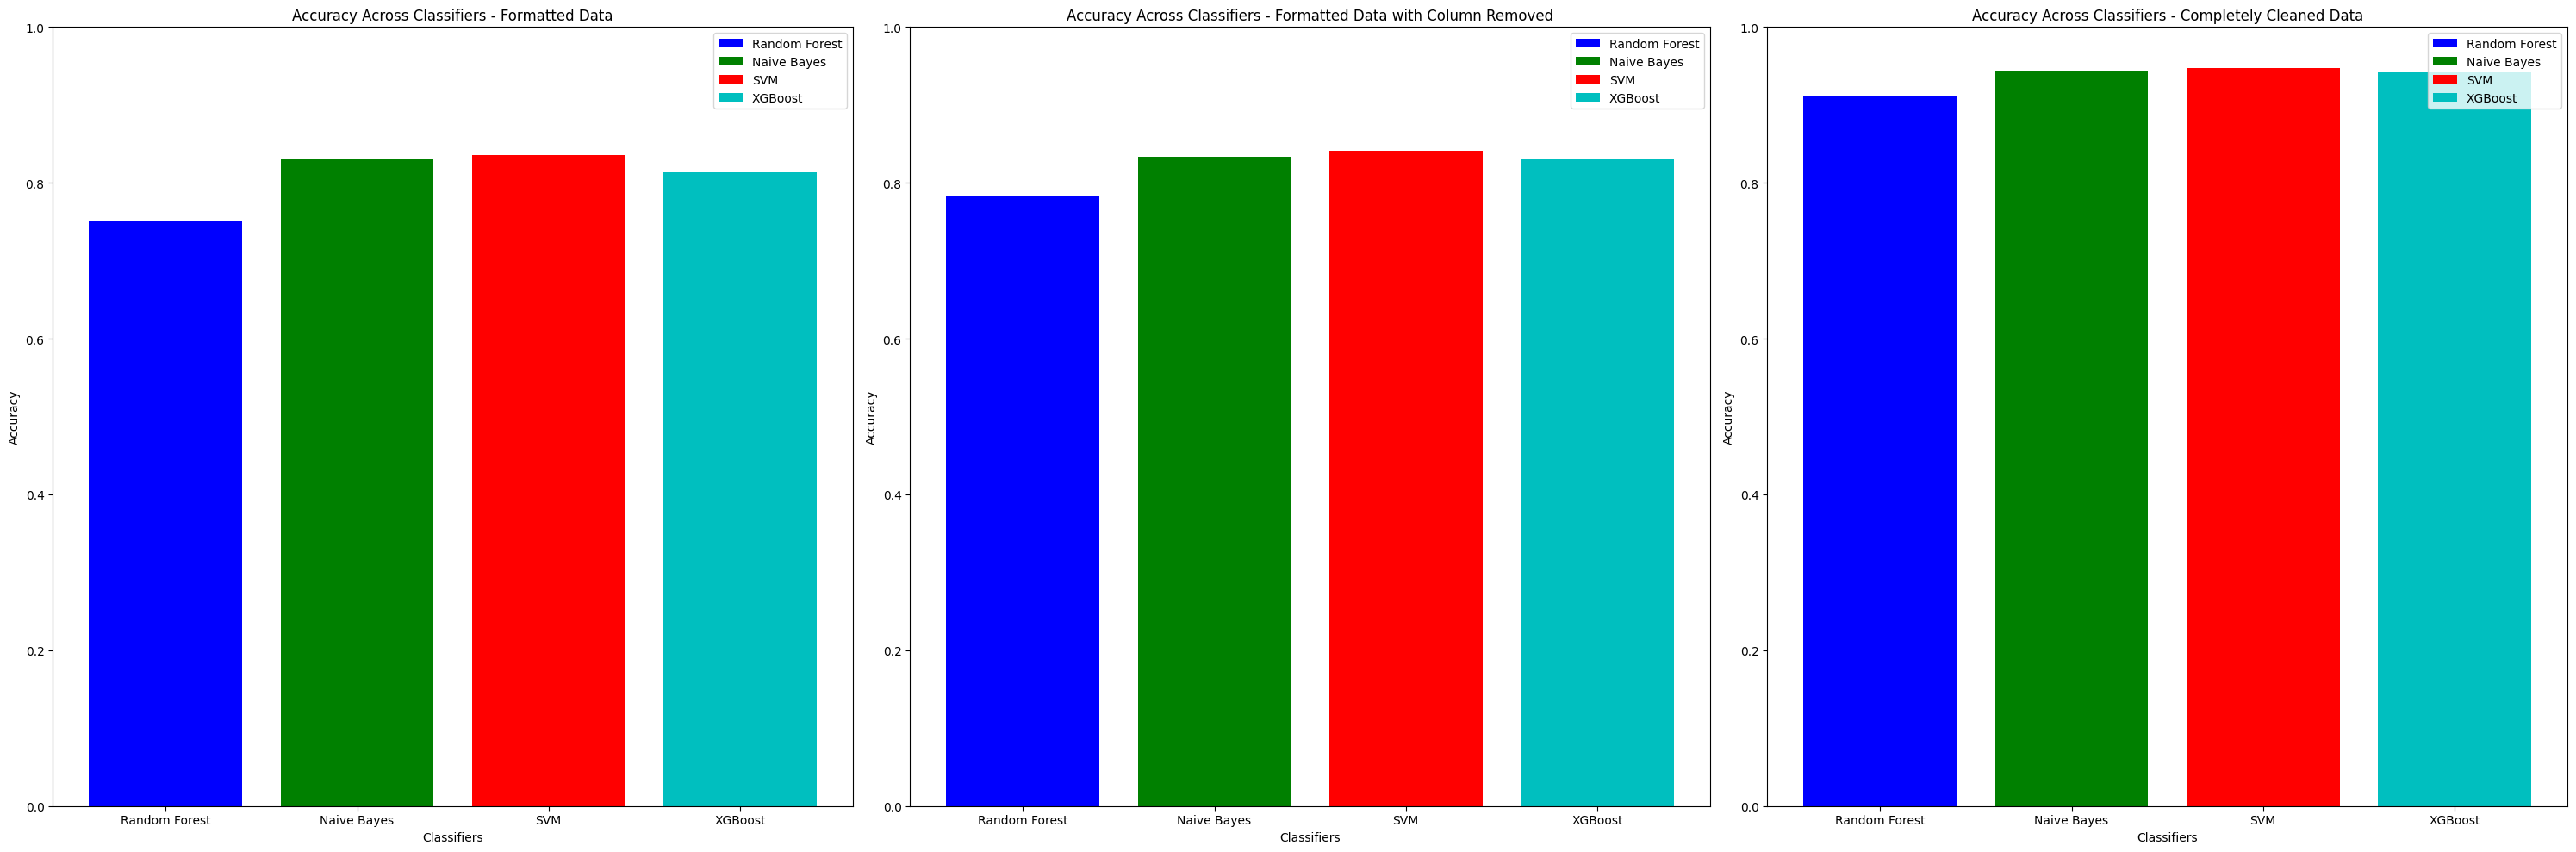

In [ ]:
# graph
# Define the classifiers and datasets
classifiers = ['Random Forest', 'Naive Bayes', 'SVM', 'XGBoost']
datasets = ['Formatted Data', 'Formatted Data with Column Removed', 'Completely Cleaned Data']

# Define the accuracy values for each classifier and dataset
accuracy_values = {
    'Random Forest': [accuracy_rf_2, accuracy_rf_1, accuracy_rf_3],
    'Naive Bayes': [accuracy_nb_3, accuracy_nb_2, accuracy_nb_1],
    'SVM': [accuracy_svm_1, accuracy_svm_3, accuracy_svm_2],
    'XGBoost': [accuracy_xgb_1, accuracy_xgb_2, accuracy_xgb_3]
}

# Set the colors for each classifier
colors = ['b', 'g', 'r', 'c']

# Create subplots for each dataset
fig, axes = plt.subplots(nrows=1, ncols=len(datasets), figsize=(30, 10))

for i, dataset in enumerate(datasets):
    ax = axes[i]
    ax.set_title(f'Accuracy Across Classifiers - {dataset}')
    ax.set_xlabel('Classifiers')
    ax.set_ylabel('Accuracy')
    ax.set_ylim([0, 1])  # Set the y-axis limit to 0-1 for accuracy values

    # Plot accuracy values for each classifier
    for j, classifier in enumerate(classifiers):
        x_pos = np.arange(len(classifiers))
        ax.bar(x_pos[j], accuracy_values[classifier][i], color=colors[j], label=classifier)

    # Set the x-axis labels and legend
    ax.set_xticks(x_pos)
    ax.set_xticklabels(classifiers)
    ax.legend()

# Adjust the layout and display the plot
plt.tight_layout()
plt.show()


When compared the models based only on the accuracy we can find that every models-  Random Forest, Naive Bayes, SVM, and XGBoost give good accuracy scores especially on the cleaned, where null values in the medication column were replaced by predictive imputation('medication' column null value replaced dataset). This indicates that null values have a significant impact on the accuracy of these classification algorithms.

Each model achieved a commendable accuracy score. However, among these models, Naive Bayes and the SVM model outperformed the others. Specifically, SVM provided slightly higher accuracy, achieving a remarkable 95% accuracy on a completely cleaned dataset.

However, when evaluating the model's performance using metrics such as precision, recall, F1-score, and cross-validation, it does not yield satisfactory results, especially in predicting the minority class 'bipolar disorder'. So we can conclude that classification algorithms that are sensitive to class imbalance. Therefore, we intend to apply data imbalance handling methods to these models. Each model has shown promising results when applied to the dataset with null values replaced in the 'medication' column. Hence, we will employ data imbalance handling methods on this dataset with different models and assess their performance.

## Handling Imbalanced Data for SVM Model

Synthetic Minority Over-sampling Technique(SMOTE) is a an approach used to handle the imbalance data problem in classification problems in machine learning and data mining.

SMOTE addresses the data imbalace problem by generating synthetic examples of the minority class by interpolating between the selected instance from the minority class and one or more of its nearest neighbors.

In [ ]:
# Check the class distribution
class_distribution = svm_cleaned_data['diagnosis'].value_counts()
print("Class Distribution:")
print(class_distribution)

# Handle missing values more effectively
svm_cleaned_data['medication'].fillna('', inplace=True)
svm_cleaned_data['patient_experience_1'].fillna('', inplace=True)
svm_cleaned_data['patient_experience_2'].fillna('', inplace=True)

# Combine text columns into a single feature column
svm_cleaned_data['combined_features'] = svm_cleaned_data['medication'] + ' ' + svm_cleaned_data['patient_experience_1'] + ' ' + svm_cleaned_data['patient_experience_2']

# Split the data into training and testing sets
X = svm_cleaned_data['combined_features']
y = svm_cleaned_data['diagnosis']

# Text Vectorization (Converting text data into numerical features)
vectorizer = CountVectorizer()
X_vec = vectorizer.fit_transform(X)

# Apply SMOTE to balance the data
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_vec, y)

# Store the balanced data in the 'balanced_data' variable
balanced_data = pd.DataFrame({'combined_features': X_resampled, 'diagnosis': y_resampled})
# Split the resampled data into training and testing sets
X_train_resampled, X_test, y_train_resampled, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Build and Train the SVM Classifier
svm_classifier = SVC(kernel='linear', C=1.0, random_state=42)
svm_classifier.fit(X_train_resampled, y_train_resampled)

# Make predictions on the test set
y_pred = svm_classifier.predict(X_test)

# Model Evaluation
accuracy_svm_resampled = accuracy_score(y_test, y_pred)
print(f'Accuracy on Balanced Data: {accuracy_svm_resampled:.2f}')

Class Distribution:
depressive disorder    1000
dementia                500
bipolar disorder        300
Name: diagnosis, dtype: int64
Accuracy on Balanced Data: 0.92


In [ ]:
# Print a classification report for more detailed evaluation
print(classification_report(y_test, y_pred))

                     precision    recall  f1-score   support

   bipolar disorder       0.90      0.86      0.88       189
           dementia       1.00      0.97      0.99       187
depressive disorder       0.88      0.93      0.90       224

           accuracy                           0.92       600
          macro avg       0.93      0.92      0.92       600
       weighted avg       0.92      0.92      0.92       600



In [ ]:
# Confusion Matrix
conf_matrix_svm_2 = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(conf_matrix_svm_2)

Confusion Matrix:
[[163   0  26]
 [  3 182   2]
 [ 16   0 208]]


In [ ]:
# Cross-validation to estimate model performance
cv_scores_svm = cross_val_score(svm_classifier, X_vec, y, cv=5)
print('Cross-Validation Scores:')
print(cv_scores_svm)
print(f'Mean CV Accuracy: {cv_scores_svm.mean():.2f}')

Cross-Validation Scores:
[0.93611111 0.93055556 0.94166667 0.94444444 0.94166667]
Mean CV Accuracy: 0.94


After applying the data imbalance method SMOTE, the SVM model exhibits good precision, recall, F1-score, and cross-validation values. These values indicate that the trained SVM model is performing consistently well across different folds of the dataset. Furthermore, the cross-validation scores do not exhibit any clear signs of overfitting.

### Handling imbalanced data for Random Forest Model

In [ ]:
# Handling missing values
df['medication'].fillna('Unknown', inplace=True)
df['patient_experience_1'].fillna('Unknown', inplace=True)
df['patient_experience_2'].fillna('Unknown', inplace=True)

# Encode categorical columns
label_encoder = LabelEncoder()
df['medication'] = label_encoder.fit_transform(df['medication'])
df['patient_experience_1'] = label_encoder.fit_transform(df['patient_experience_1'])
df['patient_experience_2'] = label_encoder.fit_transform(df['patient_experience_2'])

# Split the data into features (X) and the target variable (y)
X = df[['medication', 'patient_experience_1', 'patient_experience_2']]
y = df['diagnosis']

# Handle Class Imbalance using SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Split the resampled data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Create and train the Random Forest classifier with tuned hyperparameters
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)  # You can add hyperparameters here
rf_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_classifier.predict(X_test)

# Evaluate the model's performance
accuracy_rf_3 = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy_rf_3:.2f}')

classification_rep = classification_report(y_test, y_pred)
print('Classification Report:')
print(classification_rep)

# Confusion Matrix
conf_matrix_rf_3 = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(conf_matrix_rf_3)

# Cross-validation to estimate model performance
cv_scores_rf_3 = cross_val_score(rf_classifier, X_resampled, y_resampled, cv=5)
print('Cross-Validation Scores:')
print(cv_scores_rf_3)
print(f'Mean CV Accuracy: {cv_scores_rf_3.mean():.2f}')


Accuracy: 0.93
Classification Report:
                     precision    recall  f1-score   support

   bipolar disorder       0.91      0.89      0.90       189
           dementia       0.95      0.97      0.96       187
depressive disorder       0.91      0.92      0.92       224

           accuracy                           0.93       600
          macro avg       0.93      0.93      0.93       600
       weighted avg       0.92      0.93      0.92       600

Confusion Matrix:
[[168   5  16]
 [  2 181   4]
 [ 14   4 206]]
Cross-Validation Scores:
[0.91166667 0.91666667 0.94333333 0.91833333 0.93      ]
Mean CV Accuracy: 0.92


After applying the data imbalance correction technique SMOTE, the Random Forest model shows a significant improvement in accuracy. Additionally, it demonstrates favorable precision, recall, F1-score, and cross-validation results. Moreover, the cross-validation scores do not display any apparent signs of overfitting.

### Handling imbalanced data for XGBoost Model

In [ ]:
#Data Preprocessing
# Fill missing values in 'medication' and 'patient_experience_1', 'patient_experience_2' columns
xgboost_cleaned_data['medication'].fillna('', inplace=True)
xgboost_cleaned_data['patient_experience_1'].fillna('', inplace=True)
xgboost_cleaned_data['patient_experience_2'].fillna('', inplace=True)

# Combine text columns into a single feature column
xgboost_cleaned_data['combined_features'] = xgboost_cleaned_data['medication'] + ' ' + xgboost_cleaned_data['patient_experience_1'] + ' ' + xgboost_cleaned_data['patient_experience_2']


# Encode class labels to integers
label_encoder = LabelEncoder()
xgboost_cleaned_data['diagnosis_encoded'] = label_encoder.fit_transform(xgboost_cleaned_data['diagnosis'])

# Split the data into training and testing sets
X = xgboost_cleaned_data['combined_features']
y = xgboost_cleaned_data['diagnosis_encoded']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Text Vectorization (Converting text data into numerical features)
vectorizer = CountVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

# Handle Data Imbalance using SMOTE
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_vec, y_train)

# Adjust Class Weights
class_weights = compute_class_weight('balanced', classes=np.unique(y_train), y=y_train_resampled)

# Build and Train the XGBoost Classifier with adjusted class weights
xgb_classifier = xgb.XGBClassifier(
    objective='multi:softmax',
    num_class=len(y.unique()),
    random_state=42,
    scale_pos_weight=class_weights
)
xgb_classifier.fit(X_train_resampled, y_train_resampled)


# Make predictions on the test set
y_pred = xgb_classifier.predict(X_test_vec)

[02:38:26] WARNING: ../src/learner.cc:767: 
Parameters: { "scale_pos_weight" } are not used.



In [ ]:
# Model Evaluation
accuracy_xgb_3 = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy_xgb_3:.2f}')

Accuracy: 0.94


In [ ]:
# Print a classification report for more detailed evaluation
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.77      0.84      0.80        51
           1       0.97      1.00      0.98        86
           2       0.97      0.94      0.95       223

    accuracy                           0.94       360
   macro avg       0.90      0.93      0.91       360
weighted avg       0.94      0.94      0.94       360



In [ ]:
# Confusion Matrix
conf_matrix_xgb_3 = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(conf_matrix_xgb_3)

Confusion Matrix:
[[ 43   2   6]
 [  0  86   0]
 [ 13   1 209]]


### Handling imbalanced data for Naive Bayes Model

In [ ]:
# Data Preprocessing
naive_cleaned_data['medication'].fillna('', inplace=True)
naive_cleaned_data['patient_experience_1'].fillna('', inplace=True)
naive_cleaned_data['patient_experience_2'].fillna('', inplace=True)

# Combine text columns into a single feature column
naive_cleaned_data['combined_features'] = (
    naive_cleaned_data['medication'] + ' ' +
    naive_cleaned_data['patient_experience_1'] + ' ' +
    naive_cleaned_data['patient_experience_2']
)

# Split the data into training and testing sets
X = naive_cleaned_data['combined_features']
y = naive_cleaned_data['diagnosis']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Text Vectorization using TF-IDF
vectorizer = TfidfVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

# Handle Class Imbalance using SMOTE
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_vec, y_train)

# Compute Class Weights
class_weights = compute_class_weight('balanced', classes=np.unique(y_train), y=y_train_resampled)

# Define a range of alpha values to search
alphas = [0.1, 0.5, 1.0, 2.0, 5.0]

# Create a parameter grid
param_grid = {'alpha': alphas}

# Initialize the Naive Bayes classifier
nb_classifier = MultinomialNB()

# Perform grid search with cross-validation
grid_search = GridSearchCV(nb_classifier, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_resampled, y_train_resampled)

# Get the best hyperparameters
best_alpha = grid_search.best_params_['alpha']

# Train a new Naive Bayes classifier with the best alpha
nb_classifier_tuned = MultinomialNB(alpha=best_alpha)
nb_classifier_tuned.fit(X_train_resampled, y_train_resampled)

# Make predictions on the test set
y_pred_tuned = nb_classifier_tuned.predict(X_test_vec)

# Model Evaluation
accuracy_nb_tuned = accuracy_score(y_test, y_pred_tuned)
print(f'Tuned Model Accuracy: {accuracy_nb_tuned:.2f}')

# Print a classification report for more detailed evaluation
print(classification_report(y_test, y_pred_tuned))

# Confusion Matrix
conf_matrix_nb_tuned = confusion_matrix(y_test, y_pred_tuned)
print('Confusion Matrix:')
print(conf_matrix_nb_tuned)

# Cross-validation to estimate model performance
cv_scores_nb_1 = cross_val_score(nb_classifier, X_train_resampled, y_train_resampled, cv=5)
print('Cross-Validation Scores:')
print(cv_scores_nb_1)
print(f'Mean CV Accuracy: {cv_scores_nb_1.mean():.2f}')

Tuned Model Accuracy: 0.90
                     precision    recall  f1-score   support

   bipolar disorder       0.61      0.88      0.72        51
           dementia       0.99      1.00      0.99        86
depressive disorder       0.97      0.87      0.91       223

           accuracy                           0.90       360
          macro avg       0.86      0.92      0.88       360
       weighted avg       0.92      0.90      0.91       360

Confusion Matrix:
[[ 45   0   6]
 [  0  86   0]
 [ 29   1 193]]
Cross-Validation Scores:
[0.91648822 0.91630901 0.91630901 0.92703863 0.92274678]
Mean CV Accuracy: 0.92


### Conclusive Results

While applying data imbalance handling techniques, both the SVM and Random Forest models demonstrate substantial improvements in precision, recall, F1-score, and cross-validation scores. Notably, the Random Forest model exhibits a remarkable enhancement in these metrics.

Conversely, the Naive Bayes model does not exhibit significant changes in precision, recall, F1-score, or cross-validation scores after applying data imbalance handling methods. Similarly, the XGBoost model shows no notable differences in these scores.However, the cross-validation scores of these models do not exhibit any clear signs of overfitting.

Both **the SVM model** and **the Random Forest** models yield favorable scores and are well-suited to the given dataset.

It's important to note that the removal of null values and balancing the data have a profound impact on model performance. Training the model on high-quality data results in accurate predictions. Health-related data is inherently complex and noisy, and caution should be exercised in data preprocessing. Making assumptions about health-related data is limited, and predictions based on such data carry significant importance.

